# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [33]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x)=0$ nazywamy *pierwiastkami*.

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).  
  ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).
4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.

c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


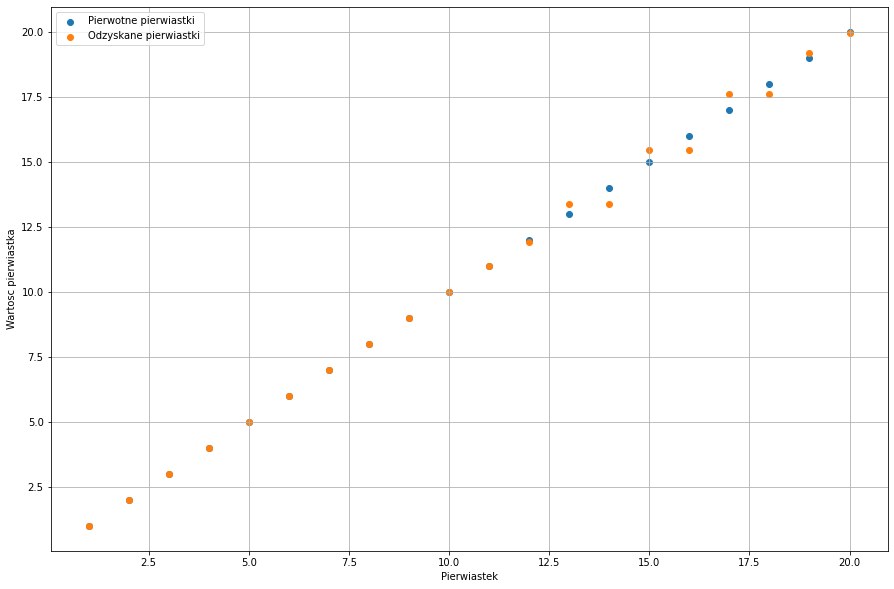

In [34]:
# Ad. 1 i Ad. 2 zaimplementowane w pliku main

# Ad. 3

# Pierwiastki wielomianu
w = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

# Wektor wspolczynnikow wielomianu
w_polly = main.polly_A(w)

# Odwrotnosc dzialania, liczymy pierwiastki wielomianu
w_roots, roots = main.roots_20(w_polly)

# Wykres
plt.figure(figsize=(15, 10))
plt.scatter(w, w, label='Pierwotne pierwiastki')
plt.scatter(w, roots, label='Odzyskane pierwiastki')
plt.xlabel('Pierwiastek')
plt.ylabel('Wartosc pierwiastka')
plt.legend(loc='best')
plt.grid()
plt.show()

# Ad. 4

# Wedlug wykresu, najbardziej podatnymi pierwiastkami na zaburzenia sa pierwiastki od 
# 13 do 19 wlacznie, ktory jest najbardziej podatny.

# Ad. 5

# Im wyzszy jest pierwiastek tym bardziej odbiega od swojego rzeczywistego wyniku, zatem
# najlepszym sposobem oszacowania powinno byc usrednienie wyniku.

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobenusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.

In [35]:
# Pierwiastki wielomianu
w2 = np.array([1, 1, 1, 1, 1, 1, 1, 1])

# Wektor wspolczynnikow wielomianu
w2_polly = main.polly_A(w2)


m, e, s, r = main.frob_a(w2_polly)

print('Macierz: \n{}\n'.format(m))
print('Wartosci wlasne macierzy: \n{}\n'.format(e))
print('Rozklad Schura: \n{}\n'.format(s[0]))
print('Pierwiastki z funkcji polyroots: \n{}\n'.format(r))
print('Pierwotne pierwiastki: \n{}\n'.format(w2))

# Wartosci wlasne w porownaniu do wartosci rozkladu rozkladu Schura sa zblizone do pierwiastkow
# wielomianu. Pierwiastki wyliczone za pomoca funkcji polyroots sa zblizone do tych pierwotnych.

Macierz: 
[[  0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [ -1.   8. -28.  56. -70.  56. -28.   8.  -1.]]

Wartosci wlasne macierzy: 
[-4.69153788+0.j          0.2884918 +1.6889081j   0.2884918 -1.6889081j
  0.51507253+0.66306355j  0.51507253-0.66306355j  0.52161447+0.30995694j
  0.52161447-0.30995694j  0.52059013+0.09353964j  0.52059013-0.09353964j]

Rozklad Schura: 
[[-4.69153788e+00 -9.29392730e-01 -1.26194300e+01 -3.62081520e+00
  -1.39810433e+00 -8.96404714e+00  5.75835831e+00  3.14357808e+01
  -1.04825206e+02]
 [ 0.00000000e+00  2.88491804e-01  2.91474068e+00  7.35782993e-01
   2.84317230e-01  1.83583546e+00 -1.18162698e+00 -6.42990334e+00
   2.1444

***Zadanie 3.***  
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.

In [36]:
w3 = np.array([16, -72, -28, 558, -990, 783, -486, 243])

m3, e3, s3, r3 = main.frob_a(w3)

print('Macierz: \n{}\n'.format(m3))
print('Wartosci wlasne macierzy: \n{}\n'.format(e3))
print('Rozklad Schura: \n{}\n'.format(s3[0]))
print('Pierwiastki z funkcji polyroots: \n{}\n'.format(r3))

# Korzystajac z kalkulatora wolfram alpha, sprawdzilem, ze podane rozwiazanie jest prawidlowe

Macierz: 
[[   0.    1.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    1.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    1.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    1.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    1.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    1.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    1.]
 [ -16.   72.   28. -558.  990. -783.  486. -243.]]

Wartosci wlasne macierzy: 
[-2.44996812e+02+0.j          6.97095244e-04+1.41143048j
  6.97095244e-04-1.41143048j -3.33333779e-01+0.j
  6.89904445e-01+0.05736542j  6.89904445e-01-0.05736542j
  6.15596992e-01+0.j          3.33345371e-01+0.j        ]

Rozklad Schura: 
[[-2.44996812e+02 -4.25534958e+02 -8.61381193e-02  2.48191771e+01
   8.44200993e+01 -1.25790994e+02 -4.58539737e+02 -1.31569715e+03]
 [ 0.00000000e+00  6.97095244e-04 -9.93974086e-01 -1.03515130e-01
   2.61774013e-02  1.92025402e-02 -1.47115851e-02  5.93764832e-03]
 [ 0.00000000e+00  2.00421321e+00  6.97095244e-0

***Zadanie 4.***

Dany jest wielomian: 
$$
w_3(x)= x^5 - 156x^4 - 5x^3 + 780x^2 + 4x - 624
$$.
 Wiedząc, że wielomian ten w postaci szeregu Czebyszewa jest następujący 
 $$w_3(x)= (a_0+\frac{a_2}{2}+ \frac{3a_4}{4})T_0(x)+(a_1+\frac{3a_3}{4}+ \frac{5a_5}{8})T_1(x)+(\frac{a_2}{2}+ \frac{a_4}{4})T_2(x)+(\frac{a_3}{4}+ \frac{5a_5}{16})T_3(x)+ (\frac{a_4}{8})T_4 + (\frac{a_5}{16})T_5(x)$$ 
 znajdź pierwiastki wykorzystując funkcję [chebroots](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebroots.html).

In [37]:
w4 = np.array([-624, 4, 780, -5, -156, 1])

# Obliczam wspolczynniki czebyszewa
cz0 = w4[0] + w4[2] / 2 + (3 * w4[4]) / 4
cz1 = w4[1] + (3 * w4[3]) / 4 + (5 * w4[5]) / 8
cz2 = w4[2] / 2 + w4[4] / 4
cz3 = w4[3] / 4 + (5 * w4[5]) / 16
cz4 = w4[4] / 8
cz5 = w4[5] / 16

czeb = np.array([cz0, cz1, cz2, cz3, cz4, cz5])

print('Rozwiazanie wielomianu za pomoca funkcji chebroots: \n{}\n'.format(np.polynomial.chebyshev.chebroots(czeb)))
print('Rozwiazanie wielomianu za pomoca funkcji polyroots: \n{}\n'.format(P.polyroots(w4)))

# Wartosci zaokraglonych wynikow w obu metodach pokrywaja sie.
# Wyniki uzyskane za pomoca funkcji chebroots sa dokladniejsze do konkretnego miejsca
# po przecinku.

Rozwiazanie wielomianu za pomoca funkcji chebroots: 
[ -2.1113158   -1.01778383   1.01798385   2.11432153 155.99679425]

Rozwiazanie wielomianu za pomoca funkcji polyroots: 
[ -2.  -1.   1.   2. 156.]

